# Electric Scooter - Project

**Team Members - MSBA '24 Morning Cohort:**
- Karthick Vel Kathirvel (kk37347)
- Sharan Arora (sa44827)
- Spandan Pal (sp54969)
- Manideep Telukuntla (mt39528)
- Pritesh Singh (ps35762)
- Raghav Vaidya (rv25256)


#Import Packages



In [ ]:
import spacy
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load("en_core_web_sm")
import warnings; warnings.simplefilter('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
nltk.download('stopwords')
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
reviews = pd.read_csv("Electric_Scooter_Reviews.csv")
features = pd.read_csv("Electric_Scooter_Features.csv")

In [ ]:
reviews.drop(columns = "product_price", inplace=True)

In [ ]:
#drop duplicates
reviews.drop_duplicates(inplace=True)
features.drop_duplicates(inplace=True)

In [ ]:
#Features has several columns with tons of missing data.
#Dropping any column w/over 150 missing rows
dt = features.isna().sum()[features.isna().sum() > 150].to_dict()
columns_to_remove = dt.keys()

features.drop(columns = columns_to_remove, inplace=True)

In [ ]:
reviews = reviews.merge(features, left_on = "product_name", right_on = "Product Name")
reviews = reviews[["serial_no","Brand","Model Name","Product Name","Color", "review_comment", "Price", "Product Rating", "review_rating",]]

In [ ]:
#Converting data types as this was creating issues before
reviews["serial_no"] = reviews["serial_no"].astype(int)
reviews["review_comment"] = reviews["review_comment"].astype(str)

In [ ]:
#Create stopWords
stopWords  = set(stopwords.words('english'))
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Create Preprocessing Functions
Remove stopwords and punctuations and provide pos tags

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Default

def preprocessText(text, useStemming=False, useNgrams=False):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    words = word_tokenize(text)
    pos_tags = pos_tag(words)

    processedWords = []

    for word, pos in pos_tags:
        wordnet_pos = get_wordnet_pos(pos)

        # Lemmatization
        wordLemmatized = lemmatizer.lemmatize(word, pos=wordnet_pos)

        # Stemming (optional)
        if useStemming:
            wordStemmed = stemmer.stem(wordLemmatized)
        else:
            wordStemmed = wordLemmatized

        # Stopword removal
        if wordStemmed not in stopWords:
            processedWords.append(wordStemmed)

    # N-grams (optional)
    if useNgrams:
        bigrams = ngrams(processedWords, 2)
        processedWords.extend(['_'.join(gram) for gram in bigrams])

    return ' '.join(processedWords)

In [ ]:
# Apply preprocessing to each text
reviews['ProcessedText'] = reviews['review_comment'].apply(preprocessText)

Word Frequency

In [ ]:
#Word Frequency
allWords = ' '.join(reviews['ProcessedText']).split()
allWordsDist = Counter(allWords)

In [ ]:
word_freq_df = pd.DataFrame([(key, value) for key,value in allWordsDist.items()], columns = ["Word", "Count"])

In [ ]:
word_freq_df.sort_values(by="Count", ascending=False, inplace=True)

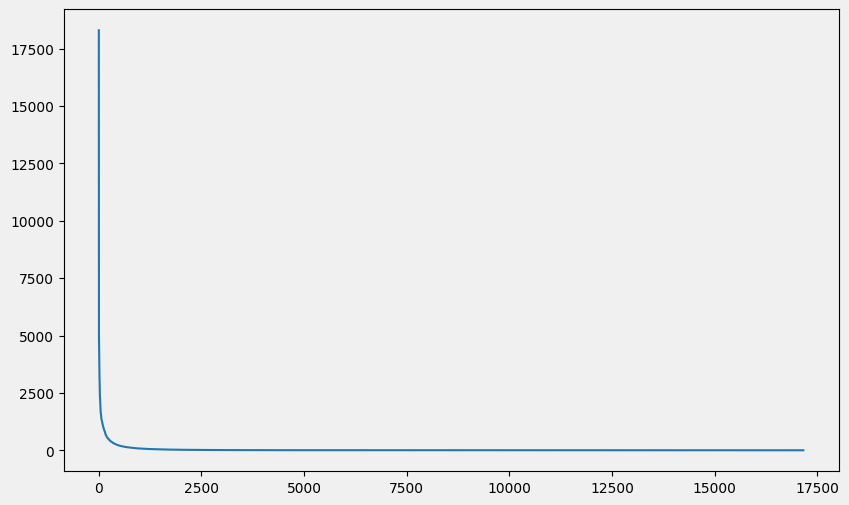

In [ ]:
# Reset the index to ensure it's sequential integers
word_freq_df = word_freq_df.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')  # Set the background color of the graph area

# Customize the line style, color, and marker
plt.plot(word_freq_df["Count"])


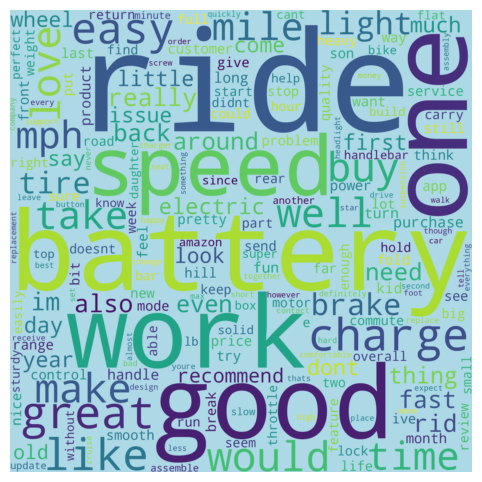

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group the DataFrame by 'Word' and sum the 'Count' for each word
word_freq_df = word_freq_df[~word_freq_df["Word"].isin(["scooter", "go", "use", "get"])]
word_counts = word_freq_df.groupby('Word')['Count'].sum().reset_index()

# Convert the grouped data to a dictionary for word cloud generation
word_count_dict = dict(zip(word_counts['Word'], word_counts['Count']))

# Create a WordCloud object
wordcloud = WordCloud(width=1920, height=1920, background_color="lightblue").generate_from_frequencies(word_count_dict)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axis
plt.show()


In [ ]:
synonymDictionary = {
    'go': ['ride', 'commute', 'travel'],
    'use': ['operate', 'handle', 'run', 'control'],
    'battery': ['power', 'energy'],
    'good': ['great', 'excellent', 'super', 'superior', 'quality', 'reliable', 'efficient', 'nice', 'pleasant'],
    'speed': ['fast', 'quick', 'mph', 'velocity'],
    'charge': ['power up', 'recharge'],
    'easy': ['simple', 'user-friendly', 'easily'],
    'buy': ['purchase', 'order'],
    'love': ['like', 'enjoy', 'prefer', 'happy', 'satisfied'],
    'time': ['minute', 'hour', 'day', 'week', 'month', 'year', 'duration', 'period', 'timeframe'],
    'light': ['headlight', 'illumination'],
    'tire': ['wheel'],
    'brake': ['stop', 'halt', 'pause', 'break'],
    'fast': ['quick', 'speedy'],
    'need': ['require', 'want', 'desire'],
    'thing': ['feature', 'aspect', 'part', 'component'],
    'electric': ['powered', 'automated'],
    'say': ['state', 'mention', 'think', 'consider', 'believe'],
    'issue': ['problem'],
    'recommend': ['suggest', 'endorse'],
    'handle': ['steer', 'control', 'manage', 'operate', 'feel'],
    'fun': ['enjoyable'],
    'turn': ['steer', 'rotate'],
    'long': ['extended', 'prolonged'],
    'product': ['model', 'unit'],
    'kid': ['child', 'son', 'daughter'],
    'fold': ['collapse', 'compact'],
    'customer': ['user', 'rider'],
    'try': ['test', 'attempt'],
    'range': ['distance', 'coverage'],
    'price': ['cost', 'money', 'funds', 'investment'],
    'way': ['method', 'manner'],
    'put': ['place', 'install'],
    'service': ['maintenance', 'support', 'help', 'assist'],
    'see': ['notice', 'observe', 'find', 'locate', 'identify'],
    'life': ['lifespan', 'duration'],
    'mode': ['setting', 'option', 'feature', 'function'],
    'hill': ['slope', 'incline'],
    'give': ['provide', 'offer', 'send', 'dispatch', 'deliver'],
    'lot': ['many', 'multiple'],
    'motor': ['engine'],
    'weight': ['heft', 'heavy', 'weighty'],
    'keep': ['retain', 'maintain', 'hold', 'grip'],
    'lock': ['secure'],
    'start': ['begin', 'initiate'],
    'big': ['large', 'spacious'],
    'road': ['path', 'route'],
    'small': ['compact', 'mini', 'little'],
    'return': ['come back'],
    'commute': ['travel'],
    'bit': ['piece'],
    'rear': ['back'],
    'carry': ['transport'],
    'bar': ['handlebar', 'steering'],
    'able': ['capable'],
    'full': ['complete'],
    'right': ['correct'],
    'throttle': ['accelerator'],
    'flat': ['level'],
    'top': ['maximum'],
    'build': ['construct', 'assemble', 'put together'],
    'lb': ['pound'],
    'box': ['package'],
    'bike': ['bicycle'],
    'amazon': ['vendor'],
    'since': ['as', 'from'],
    'solid': ['sturdy', 'durable'],
    'perfect': ['ideal', 'flawless'],
    'know': ['understand', 'recognize'],
    'update': ['upgrade', 'refresh'],
    'slow': ['sluggish'],
    'another': ['additional', 'extra'],
    'every': ['each'],
    'replacement': ['substitute'],
    'cruise': ['glide', 'sail'],
    'high': ['elevated'],
    'screw': ['fastener'],
    'best': ['top', 'ideal'],
    'foot': ['feet'],
    'company': ['brand', 'manufacturer'],
    'seat': ['saddle'],
    'car': ['vehicle'],
    'comfortable': ['comfy', 'cozy'],
    'though': ['although'],
    'drive': ['operate', 'ride'],
    'hard': ['difficult'],
    'never': ['not ever']
}

In [ ]:
def replace_synonyms(text):
  for key in synonymDictionary:
    for i in range(len(synonymDictionary[key])):
      text = text.lower().replace(synonymDictionary[key][i],key)
  return text

In [ ]:
reviews['Processed_Text'] = reviews['ProcessedText'].apply(replace_synonyms)

In [ ]:
#Based on attributes, create a list of important attributes
topAttributesFromTheData = [
    "battery", "brake", "weight", "handle", "color", "price", "range",
    "speed", "handlebar", "bar", "seat", "stand", "kickstand", "lock", "screw",
    "headlight", "warranty", "power", "charge"
]

In [ ]:
query = " ".join(["battery", "weight", "charge", "power","speed","price"])

#Calculate Similarity

In [ ]:
def calculate_similarity(reviews, query, attributes_list):
    # Convert attributes_list to lowercase
    attributes_list = [attr.lower() for attr in attributes_list]

    # Initialize CountVectorizer with the given vocabulary
    vectorizer = CountVectorizer(vocabulary=attributes_list)

    # Initialize an empty list to store results
    results = []

    # Iterate through each unique product in the DataFrame
    for product_name in reviews['Product Name'].unique():
        # Filter reviews for the current product
        product_reviews = reviews[reviews['Product Name'] == product_name]['ProcessedText']

        # Fit the vectorizer on the reviews
        reviews_bow = vectorizer.fit_transform(product_reviews)

        # Transform the query
        query_bow = vectorizer.transform([query])

        # Calculate cosine similarity
        similarity_scores = cosine_similarity(query_bow, reviews_bow).flatten()

        # Create a DataFrame to store the results for the current product
        df_current_reviews = pd.DataFrame({
            'Product Number': reviews[reviews['Product Name'] == product_name]['serial_no'].values,
            'Brand': reviews[reviews['Product Name'] == product_name]["Brand"],
            "Model Name": reviews[reviews["Product Name"] == product_name]["Model Name"],
            'Product Name': [product_name] * len(product_reviews),
            'Review Text': reviews[reviews['Product Name'] == product_name]['review_comment'].values,
            'ProcessedText': product_reviews.values,
            'Similarity Score': similarity_scores,
            'Rating': reviews[reviews["Product Name"] == product_name]["review_rating"].values
        })

        # Append the results for the current product to the overall results list
        results.append(df_current_reviews)

    # Concatenate all the results into a single DataFrame
    df_results = pd.concat(results, ignore_index=True)

    return df_results

# Example usage
reviews = calculate_similarity(reviews, query, topAttributesFromTheData)

In [ ]:
reviews.groupby(["Brand"]).agg({'Similarity Score': 'mean', 'Review Text': 'count'}).sort_values(by=['Similarity Score', 'Review Text'], ascending=False)

,Similarity Score,Review Text
Brand,,
Evdekoru,0.541341,4
Uzi,0.469964,5
Arwibon,0.408248,2
EFGTEK,0.353553,4
Ausom,0.353553,1
...,...,...
IVETA,0.000000,2
DailySports,0.000000,1
Efoee,0.000000,1


#Sentiment Analysis

In [ ]:
# Update the lexicon with domain-specific words featuring attributes
sia = SentimentIntensityAnalyzer()
sia.lexicon.update({key:0 for key in topAttributesFromTheData})
sia.lexicon.update({"scooter":0, "ride":0, "go":0})

def interpret_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

def calculate_sentiment_scores(df):
    compound_scores = []
    sentiment_labels = []

    for review in df['Review Text']:
        scores = sia.polarity_scores(review)

        # Get the compound score and its interpreted sentiment label
        compound = scores['compound']
        sentiment = interpret_sentiment(compound)
        compound_scores.append(compound)
        sentiment_labels.append(sentiment)

    df['CompoundScore'] = compound_scores
    df['SentimentLabel'] = sentiment_labels

    return df

# Assuming ReviewsCSimilarityBagOfWords is your DataFrame
reviews = calculate_sentiment_scores(reviews)

In [ ]:
#For clarity I will currently group by Brand Name
print(reviews.groupby(['Brand'])['CompoundScore'].mean().sort_values(ascending=False))

Brand
Ausom       0.988700
YADEA       0.954280
Kikpop      0.940000
Efoee       0.939800
Glion       0.918825
              ...   
Mongoose    0.079388
EFGTEK      0.013000
Schwinn    -0.009728
Arwibon    -0.600200
OBARTER    -0.975400
Name: CompoundScore, Length: 103, dtype: float64


In [ ]:
reviews['EvaluationScore'] = reviews['Similarity Score'] * reviews['CompoundScore']

In [ ]:
reviews.groupby(['Model Name'])['EvaluationScore'].mean().sort_values(ascending=False).head(15)

Model Name
Ausom Leopard    0.349558
ES07             0.344821
C45              0.341580
NKT2208-D32      0.326003
Pro              0.323651
SR05/SR11        0.291249
Highline         0.287914
H1-BSS           0.285727
GXL V2           0.284591
DollyXL          0.283467
SPT7             0.280899
GT88             0.276801
SX10             0.276801
ESMAX            0.275935
K6-Pink          0.273146
Name: EvaluationScore, dtype: float64

In [ ]:
reviews.groupby(['Brand','Model Name'])['EvaluationScore'].mean().sort_values(ascending=False).head(10).index

MultiIndex([('Evdekoru',         'HT-T4'),
            (   'Ausom', 'Ausom Leopard'),
            (  'EFGTEK',          'ES07'),
            (   'Razor',           'C45'),
            (   'NAVEE',   'NKT2208-D32'),
            ( 'SMOOSAT',           'Pro'),
            (  'VOLPAM',     'SR05/SR11'),
            (  'Jetson',      'Highline'),
            ( 'Hover-1',        'H1-BSS'),
            (  'Gotrax',        'GXL V2')],
           names=['Brand', 'Model Name'])

#Task G

In [ ]:
reviews.groupby(["Model Name"])['Rating'].agg(['mean','count']).sort_values(by = ["count", "mean"], ascending=False)[:10]

,mean,count
Model Name,,
ES32,3.584906,212
E9T,4.740000,200
GXL V2,4.640000,200
Primer,4.640000,200
S2 Pro,4.490000,200
RipStiks,4.080000,200
Neon Series,3.880000,200
Ninebot Electric Kick Scooter - F25/F30/F40/F72,3.480000,200
Ecosmart,3.941176,170


# Final Score

In [ ]:
#Select Top 10 Products based on count of reviews
product_names = reviews["Model Name"].value_counts()[:10].index

In [ ]:
product_names_l = reviews.groupby(['Model Name'])['EvaluationScore'].mean().sort_values(ascending=False).head(10).index

In [ ]:
reqd_reviews_df = reviews[reviews['Model Name'].isin(product_names_l)]

<Axes: ylabel='Model Name'>

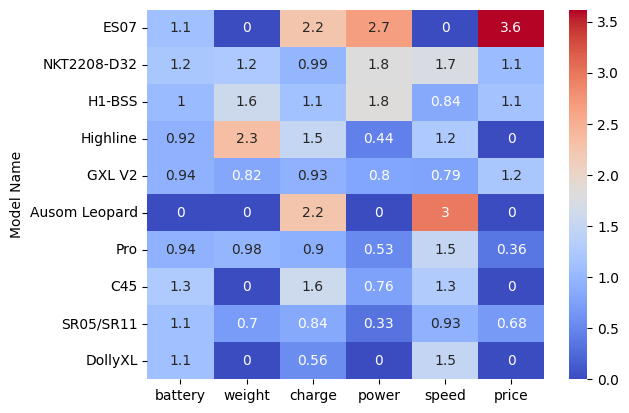

In [ ]:
#calcualte lift values betwen the selected products and the shotlisted attributes
import seaborn as sns

for attribute in query.split():
    reqd_reviews_df[attribute] = reqd_reviews_df['ProcessedText'].map(lambda x: 1 if attribute in x else 0)

attr_matrix = pd.DataFrame(index=product_names_l, columns=query.split()+["agg"])

for product in product_names_l:
  freq_brand = (reqd_reviews_df["Model Name"]==product).sum()
  agg=0
  for attr in query.split():
    freq_attr = sum(reqd_reviews_df[attr] == 1)
    freq_both = sum( (reqd_reviews_df["Model Name"]==product) & (reqd_reviews_df[attr] == 1 ) )
    lift = len(reqd_reviews_df) * freq_both / (freq_brand * freq_attr)
    attr_matrix.loc[product, attr] = lift
    agg+=lift
  attr_matrix.loc[product, "agg"] = agg

attr_matrix = attr_matrix.fillna(0)

attr_reqd = attr_matrix["agg"].sort_values(ascending=False).head(10).index
attr_matrix_reqd = attr_matrix.loc[attr_reqd][query.split()]

sns.heatmap(attr_matrix_reqd, annot=True, cmap="coolwarm")

In [ ]:
reqd_reviews_df[["Brand", "Model Name"]].value_counts()

Brand    Model Name   
Gotrax   GXL V2           200
Hover-1  H1-BSS            64
NAVEE    NKT2208-D32       41
SMOOSAT  Pro               40
VOLPAM   SR05/SR11         32
Jetson   Highline          12
Razor    C45                7
EFGTEK   ES07               4
Glion    DollyXL            4
Ausom    Ausom Leopard      1
dtype: int64